#Imports

In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 857.8 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import MEstimateEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

ds = pd.read_csv('/content/housedata.csv')
ds

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


#Data Preprocessing

In [4]:
y=ds.price
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [5]:
ds = ds[['street', 'statezip', 'city', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_lot']]

In [6]:
ds=ds.join(y)

In [7]:
ds

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912,3.130000e+05
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050,2.384000e+06
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947,3.420000e+05
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030,4.200000e+05
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500,5.500000e+05
...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360,3.081667e+05
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573,5.343333e+05
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014,4.169042e+05
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630,2.034000e+05


In [8]:
X = ds.iloc[:,:-1]
y = ds.iloc[:,-1]

In [9]:
encoder = MEstimateEncoder(cols=["street",	"statezip",	"city"])
X=encoder.fit_transform(X,y)

In [10]:
X

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,4.324815e+05,376321.847395,421453.417470,1340,1340,1.50,7912
1,1.467981e+06,907191.926436,579819.757957,3650,3370,2.50,9050
2,4.469815e+05,322538.216293,440097.124991,1930,1930,2.00,11947
3,4.859815e+05,601963.097813,846152.029983,2000,1000,2.25,8030
4,5.509815e+05,636926.361052,667159.337551,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,4.300648e+05,376321.847395,579819.757957,1510,1510,1.75,6360
4596,5.431482e+05,636924.908045,846152.029983,1460,1460,2.50,7573
4597,4.844336e+05,499946.491775,377635.939193,3010,3010,2.50,7014
4598,3.776815e+05,269673.468103,579819.757957,2090,1070,2.00,6630


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

#Data Visualization

<Axes: >

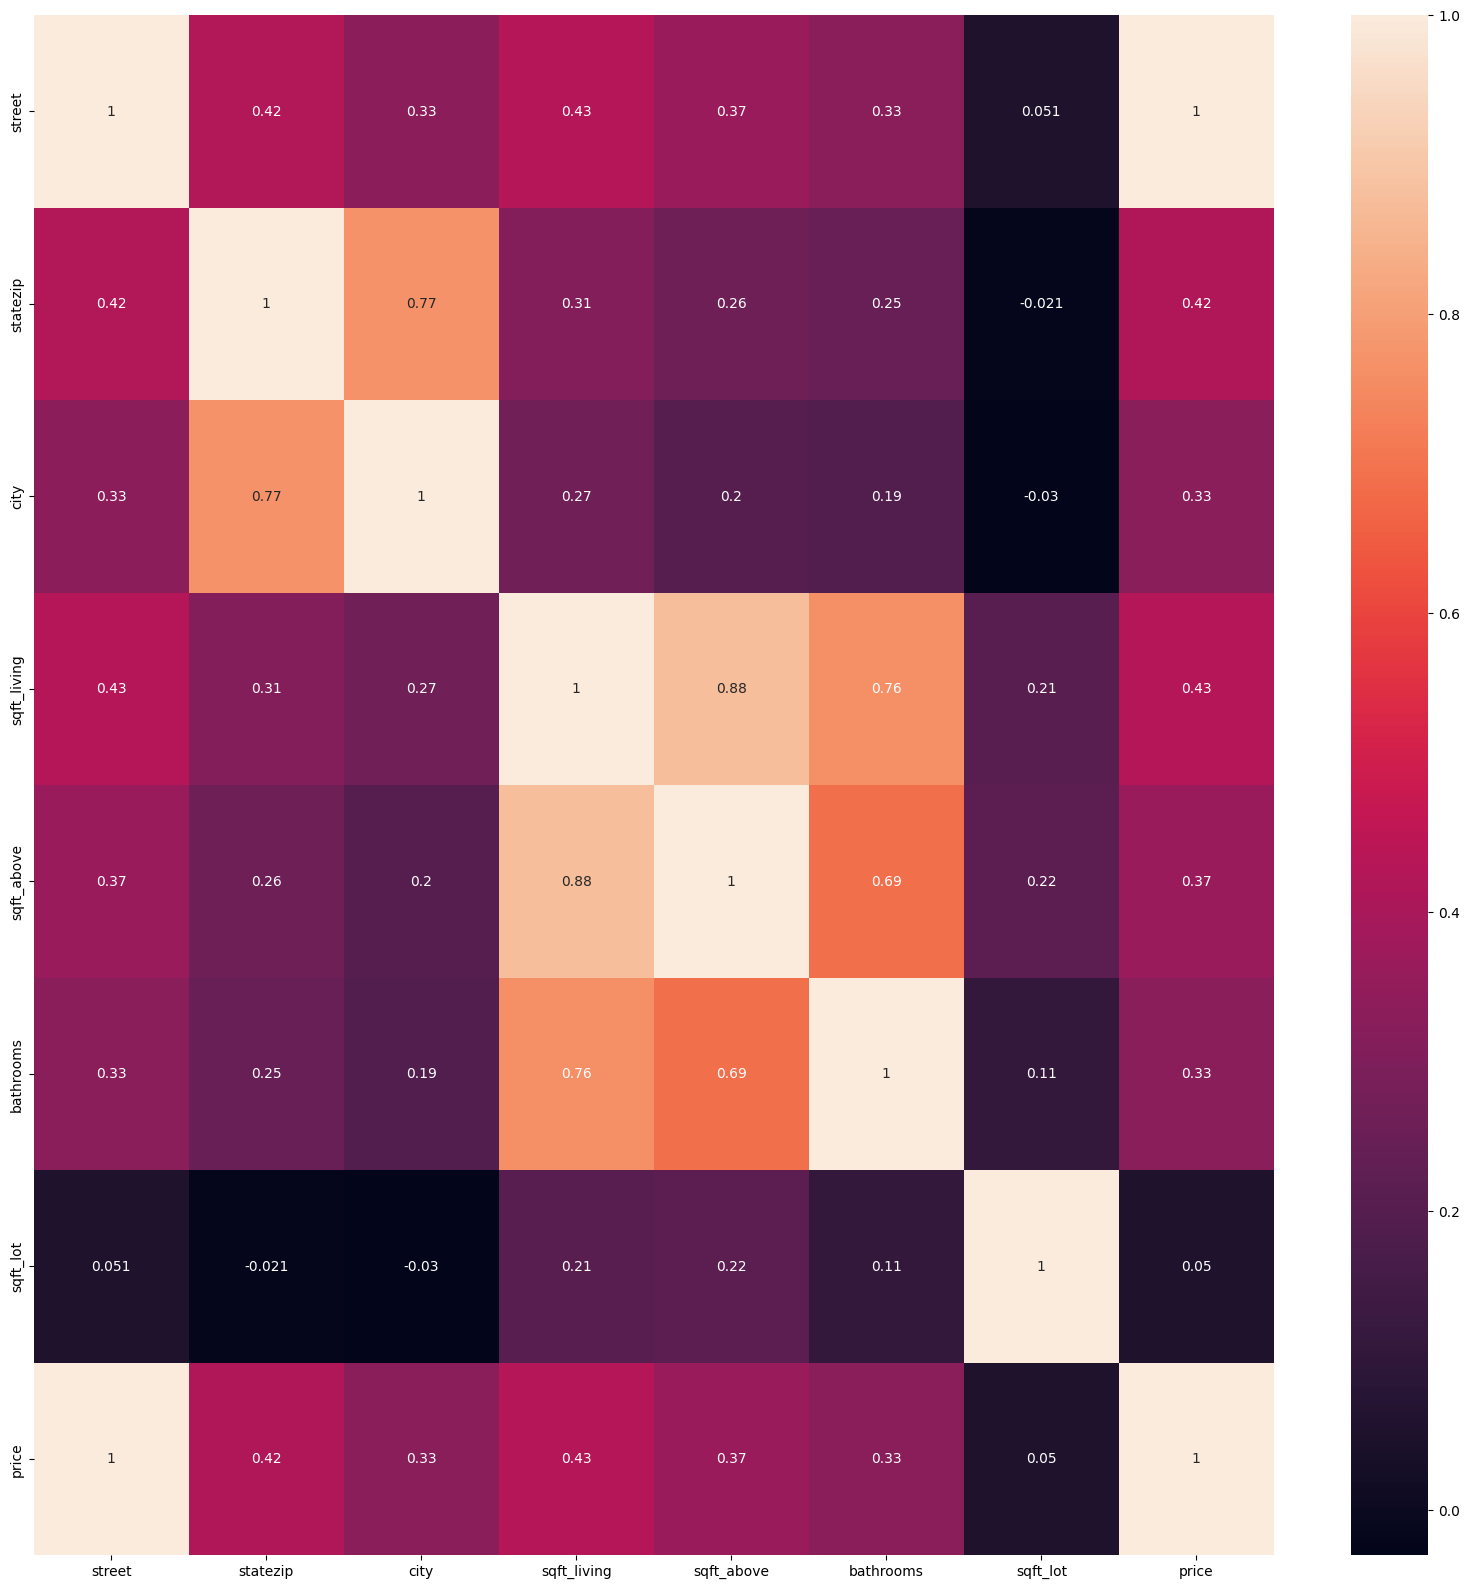

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(X.join(y).corr(),annot=True)

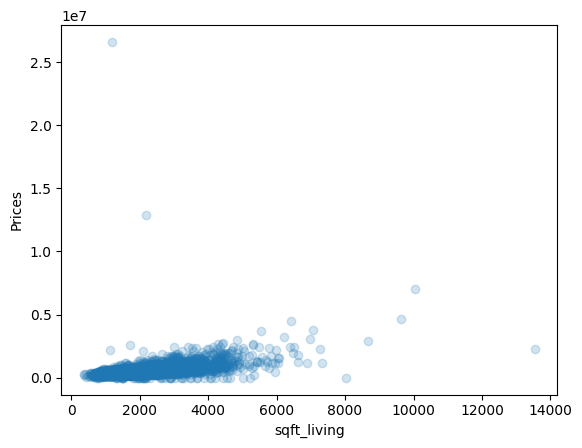

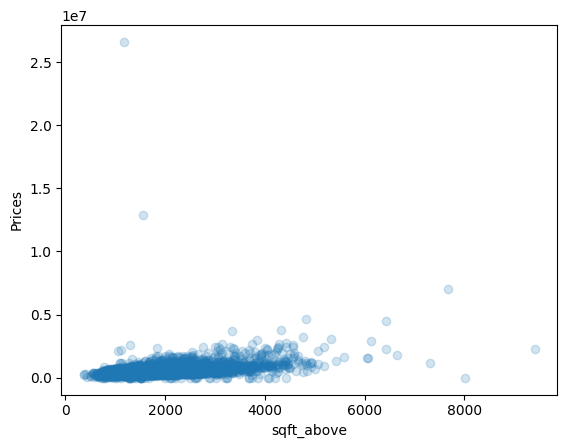

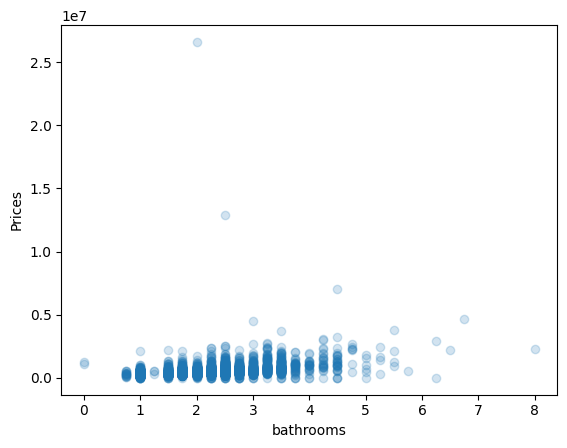

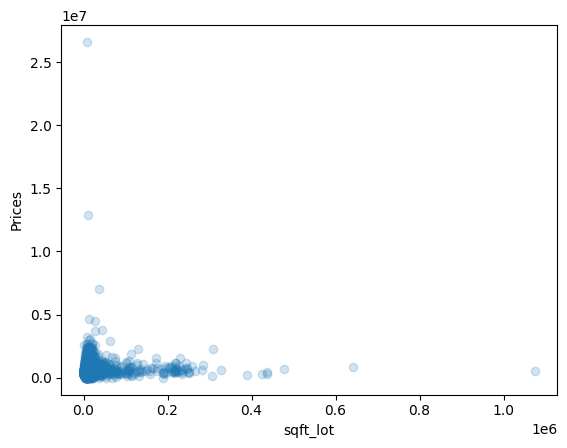

In [13]:
linear = ["sqft_living","sqft_above","bathrooms","sqft_lot"]
for i in linear:
  plt.figure()
  plt.scatter(X[i],y,alpha=0.2)
  plt.xlabel(i)
  plt.ylabel('Prices')
  plt.show()

#Model Creation

##Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

##Random Forest Regressor

In [15]:
rfr = RandomForestRegressor(criterion="squared_error",max_depth=7,min_samples_split=10,random_state=25)

In [16]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_split=10, random_state=25)

##Decision Tree Regressor

In [17]:
dtr = DecisionTreeRegressor(criterion='squared_error',min_samples_split=10,max_depth=7,random_state=50)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=50)

##Gradient Boosting Regressor

In [18]:
gbr = GradientBoostingRegressor(loss="squared_error",learning_rate=0.5,n_estimators=100)
gbr.fit(X_train,y_train)
gbr.score(X_train,y_train)

0.9998358789944459

#Model Evaluation

##Linear Regression

In [19]:
lr.score(X_train,y_train)

0.9922070027860135

In [20]:
lr.score(X_test,y_test)

0.9980642771995423

In [21]:
n=int(input("Enter sl no : "))

Enter sl no : 5


In [22]:
x=X.iloc[n,:]
x=np.array(x)

In [23]:
X

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,4.324815e+05,376321.847395,421453.417470,1340,1340,1.50,7912
1,1.467981e+06,907191.926436,579819.757957,3650,3370,2.50,9050
2,4.469815e+05,322538.216293,440097.124991,1930,1930,2.00,11947
3,4.859815e+05,601963.097813,846152.029983,2000,1000,2.25,8030
4,5.509815e+05,636926.361052,667159.337551,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,4.300648e+05,376321.847395,579819.757957,1510,1510,1.75,6360
4596,5.431482e+05,636924.908045,846152.029983,1460,1460,2.50,7573
4597,4.844336e+05,499946.491775,377635.939193,3010,3010,2.50,7014
4598,3.776815e+05,269673.468103,579819.757957,2090,1070,2.00,6630


In [24]:
x=x.reshape(1,-1)

In [25]:
print("The prediction was ",lr.predict(x)," and the actual values was ",y[n])

The prediction was  [486233.89030565]  and the actual values was  490000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Random Forest Regressor

In [26]:
rfr.score(X_train,y_train)

0.9271847840341408

In [27]:
rfr.score(X_test,y_test)

0.9955101923328112

In [28]:
n=int(input("Enter sl no : "))

Enter sl no : 5


In [29]:
x=X.iloc[n,:]
x=np.array(x)

In [30]:
X

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,4.324815e+05,376321.847395,421453.417470,1340,1340,1.50,7912
1,1.467981e+06,907191.926436,579819.757957,3650,3370,2.50,9050
2,4.469815e+05,322538.216293,440097.124991,1930,1930,2.00,11947
3,4.859815e+05,601963.097813,846152.029983,2000,1000,2.25,8030
4,5.509815e+05,636926.361052,667159.337551,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,4.300648e+05,376321.847395,579819.757957,1510,1510,1.75,6360
4596,5.431482e+05,636924.908045,846152.029983,1460,1460,2.50,7573
4597,4.844336e+05,499946.491775,377635.939193,3010,3010,2.50,7014
4598,3.776815e+05,269673.468103,579819.757957,2090,1070,2.00,6630


In [31]:
x=x.reshape(1,-1)

In [32]:
print("The prediction was ",rfr.predict(x)," and the actual values was ",y[n])

The prediction was  [490271.91577389]  and the actual values was  490000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


##Decision Tree Regressor

In [33]:
dtr.score(X_train,y_train)

0.9266229222561915

In [34]:
dtr.score(X_test,y_test)

0.9849679097873324

In [35]:
n=int(input("Enter sl no : "))

Enter sl no : 5


In [36]:
x=X.iloc[n,:]
x=np.array(x)

In [37]:
X

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,4.324815e+05,376321.847395,421453.417470,1340,1340,1.50,7912
1,1.467981e+06,907191.926436,579819.757957,3650,3370,2.50,9050
2,4.469815e+05,322538.216293,440097.124991,1930,1930,2.00,11947
3,4.859815e+05,601963.097813,846152.029983,2000,1000,2.25,8030
4,5.509815e+05,636926.361052,667159.337551,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,4.300648e+05,376321.847395,579819.757957,1510,1510,1.75,6360
4596,5.431482e+05,636924.908045,846152.029983,1460,1460,2.50,7573
4597,4.844336e+05,499946.491775,377635.939193,3010,3010,2.50,7014
4598,3.776815e+05,269673.468103,579819.757957,2090,1070,2.00,6630


In [38]:
x=x.reshape(1,-1)

In [39]:
print("The prediction was ",dtr.predict(x)," and the actual values was ",y[n])

The prediction was  [482541.96086957]  and the actual values was  490000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


##Gradient Boosting Regressor

In [40]:
gbr.score(X_train,y_train)

0.9998358789944459

In [41]:
gbr.score(X_test,y_test)

0.9951753469918448

In [42]:
n=int(input("Enter sl no : "))

Enter sl no : 5


In [43]:
x=X.iloc[n,:]
x=np.array(x)

In [44]:
X

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,4.324815e+05,376321.847395,421453.417470,1340,1340,1.50,7912
1,1.467981e+06,907191.926436,579819.757957,3650,3370,2.50,9050
2,4.469815e+05,322538.216293,440097.124991,1930,1930,2.00,11947
3,4.859815e+05,601963.097813,846152.029983,2000,1000,2.25,8030
4,5.509815e+05,636926.361052,667159.337551,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,4.300648e+05,376321.847395,579819.757957,1510,1510,1.75,6360
4596,5.431482e+05,636924.908045,846152.029983,1460,1460,2.50,7573
4597,4.844336e+05,499946.491775,377635.939193,3010,3010,2.50,7014
4598,3.776815e+05,269673.468103,579819.757957,2090,1070,2.00,6630


In [45]:
x=x.reshape(1,-1)

In [46]:
print("The prediction was ",gbr.predict(x)," and the actual values was ",y[n])

The prediction was  [484264.77550139]  and the actual values was  490000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
